https://plantuml.app/editor

### 3.1.1 Алгоритм Лувена

In [ ]:
Псевдокод:

АЛГОРИТМ Louvain(G)
ВХОД: G = (V, E, W) — взвешенный граф
ВЫХОД: Множество кластеров ℭ = {𝒞₁, 𝒞₂, ..., 𝒞ₖ}

1. Инициализация:
   ДЛЯ КАЖДОЙ вершины v ∈ V:
       community[v] ← v  // каждая вершина в своем сообществе

2. ПОВТОРЯТЬ:
   improvement ← false
   
   // Фаза 1: Локальная оптимизация
   ДЛЯ КАЖДОЙ вершины i ∈ V:
       current_comm ← community[i]
       best_comm ← current_comm
       max_gain ← 0
       
       // Рассмотреть перемещение в сообщества соседей
       ДЛЯ КАЖДОГО соседа j вершины i:
           neighbor_comm ← community[j]
           gain ← ΔQ(i, neighbor_comm)  // прирост модулярности
           
           ЕСЛИ gain > max_gain:
               max_gain ← gain
               best_comm ← neighbor_comm
       
       ЕСЛИ best_comm ≠ current_comm:
           community[i] ← best_comm
           improvement ← true
   
   // Фаза 2: Агрегация сообществ
   ЕСЛИ improvement:
       G' ← BuildAggregatedGraph(G, community)
       G ← G'

ПОКА improvement

3. ВОЗВРАТ community

UML

@startuml
title Алгоритм Louvain

actor User

User -> Алгоритм: Запуск(G)

Алгоритм -> Сообщества: Инициализация\nкаждая вершина в своем сообществе

loop Пока есть улучшения
    Алгоритм -> Сообщества: improvement = false
    
    loop Для каждой вершины i
        Сообщества -> Модулярность: Проверить соседей\nвычислить ΔQ
        Модулярность --> Сообщества: gain
        
        alt gain > 0
            Сообщества -> Сообщества: Переместить вершину\nв лучшее сообщество
            Сообщества -> Сообщества: improvement = true
        end
    end
    
    alt improvement == true
        Алгоритм -> Агрегатор: Построить новый граф
        Агрегатор --> Алгоритм: G'
        Алгоритм -> Алгоритм: G = G'
    end
end

Алгоритм --> User: Результат кластеризации
@enduml

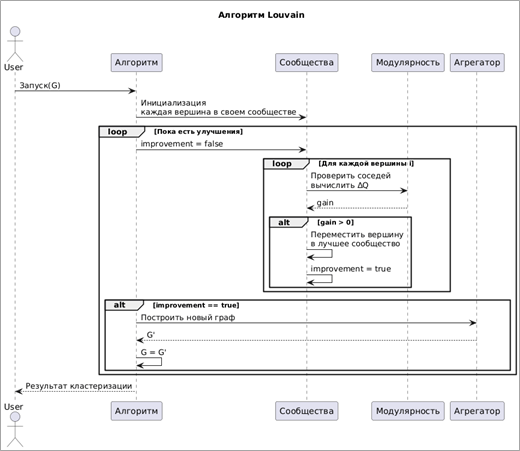

In [1]:
from IPython.display import Image
Image(filename='UML-диаграмма Лувена.png')

### 3.1.2 Иерархическая кластеризация

In [ ]:
ПСЕВДОКОД

АЛГОРИТМ HierarchicalClustering(D, k, linkage)
ВХОД: D — матрица расстояний n×n, k — число кластеров, linkage — метод связи
ВЫХОД: Множество k кластеров

1. Инициализация:
   ДЛЯ i ← 1 ДО n:
       clusters[i] ← {i}  // каждый элемент в своем кластере
   
   num_clusters ← n

2. ПОКА num_clusters > k:
   
   // Найти два ближайших кластера
   min_dist ← ∞
   best_pair ← null
   
   ДЛЯ КАЖДОЙ пары кластеров (Cᵢ, Cⱼ):
       dist ← ComputeLinkageDistance(Cᵢ, Cⱼ, D, linkage)
       
       ЕСЛИ dist < min_dist:
           min_dist ← dist
           best_pair ← (i, j)
   
   // Объединить ближайшие кластеры
   (i, j) ← best_pair
   clusters[i] ← clusters[i] ∪ clusters[j]
   УДАЛИТЬ clusters[j]
   num_clusters ← num_clusters - 1

3. ВОЗВРАТ clusters

ФУНКЦИЯ ComputeLinkageDistance(C₁, C₂, D, linkage):
   ЕСЛИ linkage = 'single':  // одиночная связь
       ВОЗВРАТ min{D[i,j] : i ∈ C₁, j ∈ C₂}
   ИНАЧЕ ЕСЛИ linkage = 'complete':  // полная связь
       ВОЗВРАТ max{D[i,j] : i ∈ C₁, j ∈ C₂}
   ИНАЧЕ ЕСЛИ linkage = 'average':  // средняя связь
       ВОЗВРАТ mean{D[i,j] : i ∈ C₁, j ∈ C₂}
   ИНАЧЕ ЕСЛИ linkage = 'ward':  // метод Варда
       ВОЗВРАТ WardDistance(C₁, C₂, D)


In [ ]:
UML

@startuml
title Алгоритм иерархической кластеризации

actor User

User -> Алгоритм: Запуск(D, k, linkage)

Алгоритм -> Кластеры: Инициализация\nкаждый элемент в своем кластере
Кластеры --> Алгоритм: clusters, num_clusters = n

loop ПОКА num_clusters > k
    Алгоритм -> ПоискПары: Найти ближайшие кластеры
    ПоискПары -> ВычислениеРасстояния: Для каждой пары кластеров
    loop ДЛЯ КАЖДОЙ пары (Cᵢ, Cⱼ)
        ВычислениеРасстояния -> ВычислениеРасстояния: ComputeLinkageDistance(Cᵢ, Cⱼ, D, linkage)
        ВычислениеРасстояния --> ПоискПары: dist
        alt dist < min_dist
            ПоискПары -> ПоискПары: Обновить min_dist, best_pair
        end
    end
    ПоискПары --> Алгоритм: best_pair, min_dist
    
    Алгоритм -> Кластеры: Объединить кластеры best_pair
    Кластеры -> Кластеры: clusters[i] = clusters[i] ∪ clusters[j]\nУдалить clusters[j]
    Кластеры --> Алгоритм: num_clusters--
end

Алгоритм --> User: Результат: k кластеров
@enduml

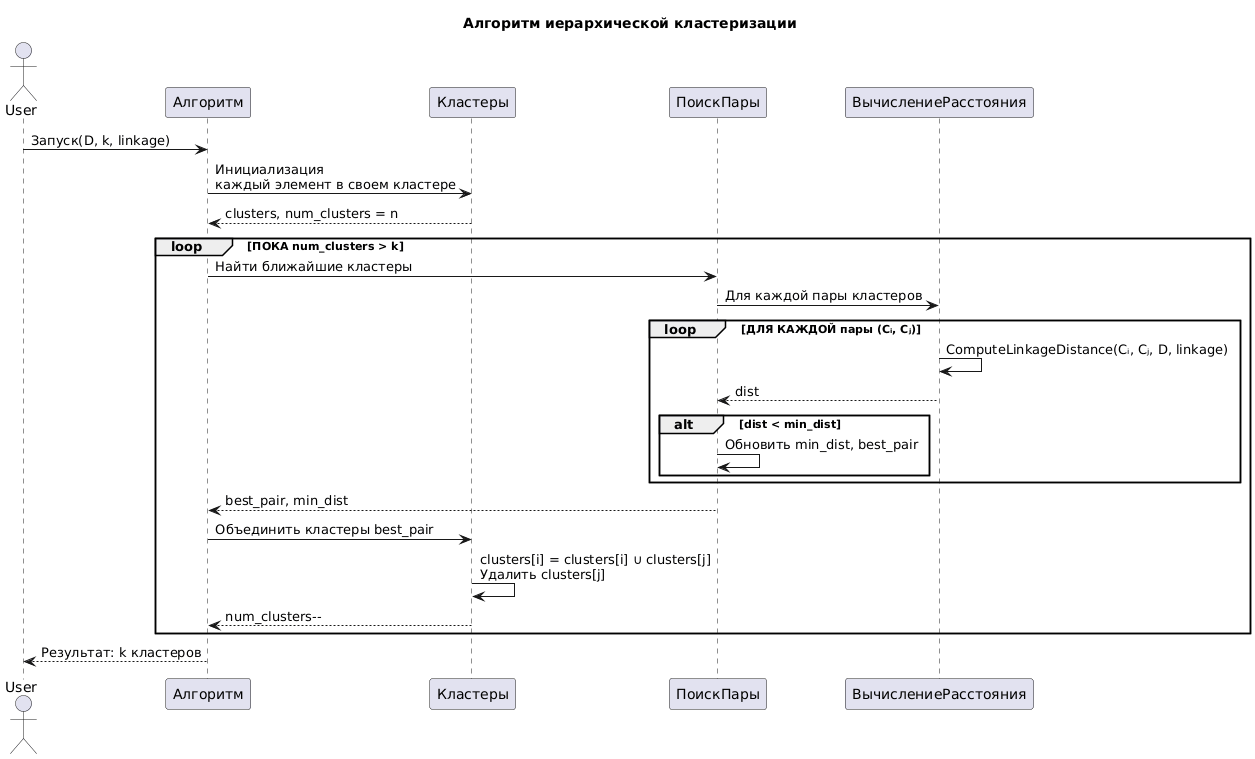

In [17]:
from IPython.display import Image
Image(filename='UML иерархическая класт.png')

### 3.1.3 K-means

In [ ]:
ПСЕВДОКОД

АЛГОРИТМ KMeans(X, k, max_iter)
ВХОД: X — матрица данных n×d, k — число кластеров, max_iter — макс. итераций
ВЫХОД: Метки кластеров для каждого элемента

1. Инициализация центроидов:
   centroids ← RandomSample(X, k)  // случайный выбор k элементов

2. ДЛЯ iter ← 1 ДО max_iter:
   
   // Шаг присваивания: назначить элементы ближайшим центроидам
   ДЛЯ КАЖДОГО элемента xᵢ ∈ X:
       min_dist ← ∞
       best_cluster ← null
       
       ДЛЯ j ← 1 ДО k:
           dist ← ||xᵢ - centroids[j]||²
           
           ЕСЛИ dist < min_dist:
               min_dist ← dist
               best_cluster ← j
       
       labels[i] ← best_cluster
   
   // Шаг обновления: пересчитать центроиды
   old_centroids ← centroids
   
   ДЛЯ j ← 1 ДО k:
       cluster_points ← {xᵢ : labels[i] = j}
       centroids[j] ← mean(cluster_points)
   
   // Проверка сходимости
   ЕСЛИ ||centroids - old_centroids|| < ε:
       BREAK

3. ВОЗВРАТ labels


UML

@startuml
title Алгоритм K-Means

actor User

User -> KMeans: Запуск(X, k, max_iter)

KMeans -> Центроиды: Инициализация\nслучайный выбор k элементов

loop Для iter от 1 до max_iter
    KMeans -> KMeans: labels = []
    
    loop Для каждого элемента x_i ∈ X
        KMeans -> Расстояния: min_dist = ∞\nbest_cluster = null
        
        loop Для j от 1 до k
            Расстояния -> Расстояния: dist = ||x_i - centroids[j]||²
            
            alt dist < min_dist
                Расстояния -> Расстояния: min_dist = dist\nbest_cluster = j
            end
        end
        
        Расстояния --> KMeans: best_cluster
        KMeans -> KMeans: labels[i] = best_cluster
    end
    
    KMeans -> Центроиды: old_centroids = centroids
    
    loop Для j от 1 до k
        KMeans -> Кластер: cluster_points = {x_i : labels[i] = j}
        Кластер -> Центроиды: centroids[j] = mean(cluster_points)
    end
    
    KMeans -> Сходимость: Проверить ||centroids - old_centroids|| < ε
    
    alt Сходимость достигнута
        KMeans -> KMeans: BREAK
    end
end

KMeans --> User: labels
@enduml

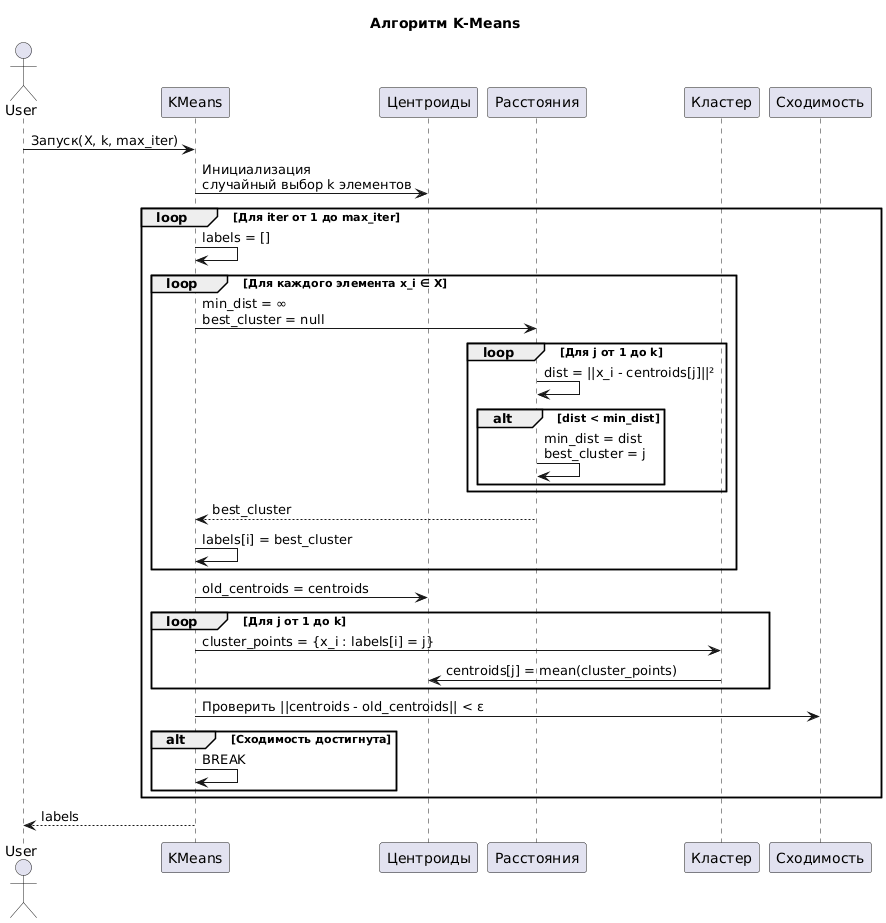

In [15]:
from IPython.display import Image
Image(filename='UML-k-means.png')

### 3.1.4 Спектральная кластеризация

In [ ]:
ПСЕВДОКОД

Псевдокод спектральной кластеризации:
АЛГОРИТМ SpectralClustering(W, k)
ВХОД: W — матрица близости n×n (граф), k — число кластеров
ВЫХОД: Метки кластеров

1. Построение матрицы Лапласа:
   D ← DiagonalMatrix(deg(v₁), deg(v₂), ..., deg(vₙ))
   L ← D - W  // ненормализованный Лапласиан
   // Альтернатива: Lₙₒᵣₘ ← I - D⁻¹/²WD⁻¹/² (нормализованный)

2. Вычисление собственных векторов:
   (λ₁, v₁), (λ₂, v₂), ..., (λₖ, vₖ) ← SmallestEigenvalues(L, k)
   // λ₁ ≤ λ₂ ≤ ... ≤ λₖ — k наименьших собственных значений
   
   V ← [v₁ v₂ ... vₖ]  // матрица n×k

3. Нормализация строк:
   ДЛЯ i ← 1 ДО n:
       V[i,:] ← V[i,:] / ||V[i,:]||

4. Применение K-means:
   labels ← KMeans(V, k)

5. ВОЗВРАТ labels


In [ ]:
UML

@startuml
title Алгоритм спектральной кластеризации - Детальная последовательность

actor User

User -> SpectralClustering: Запуск(W, k)

SpectralClustering -> MatrixBuilder: Построить матрицу Лапласа
MatrixBuilder -> MatrixBuilder: D = DiagonalMatrix(deg(v₁), deg(v₂), ...)
MatrixBuilder -> MatrixBuilder: L = D - W (ненормализованный)
MatrixBuilder --> SpectralClustering: L

SpectralClustering -> EigenSolver: Вычислить k наименьших\nсобственных значений/векторов
EigenSolver -> EigenSolver: (λ₁, v₁), (λ₂, v₂), ..., (λₖ, vₖ)
EigenSolver -> EigenSolver: V = [v₁ v₂ ... vₖ] (n×k матрица)
EigenSolver --> SpectralClustering: V

SpectralClustering -> Normalizer: Нормализовать строки V
loop Для каждой строки i от 1 до n
    Normalizer -> Normalizer: V[i,:] = V[i,:] / ||V[i,:]||
end
Normalizer --> SpectralClustering: V_normalized

SpectralClustering -> KMeans: Кластеризация(V_normalized, k)
KMeans -> KMeans: Выполнить K-means алгоритм
KMeans --> SpectralClustering: labels

SpectralClustering --> User: Метки кластеров
@enduml

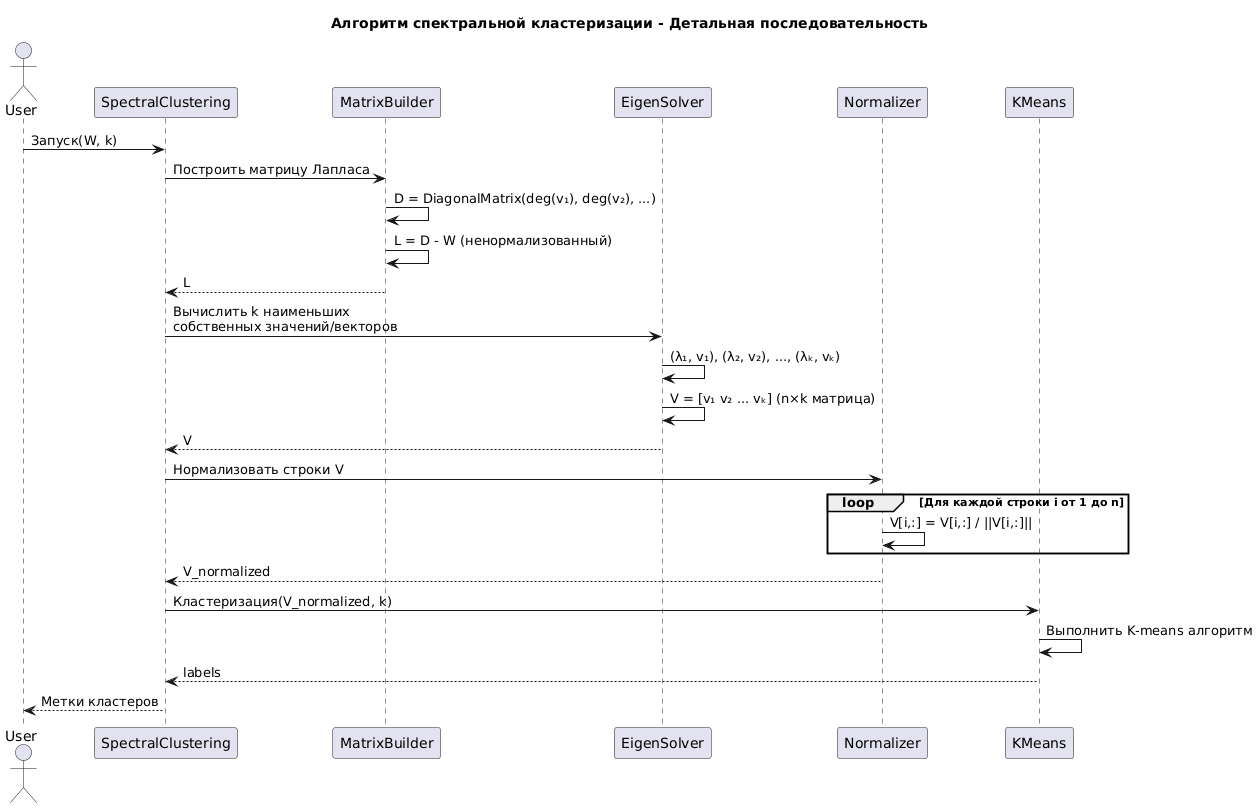

In [22]:
from IPython.display import Image
Image(filename='UML спектральн класт.png')

### 3.1.4 DBSCAN

In [ ]:
ПСЕВДОКОД

АЛГОРИТМ DBSCAN(D, eps, min_samples)
ВХОД: D — матрица расстояний, eps — радиус окрестности, min_samples — мин. точек
ВЫХОД: Метки кластеров (-1 для шума)

1. Инициализация:
   labels ← [-1, -1, ..., -1]  // все точки не классифицированы
   cluster_id ← 0

2. ДЛЯ КАЖДОЙ точки p:
   
   ЕСЛИ labels[p] ≠ -1:  // точка уже обработана
       ПРОДОЛЖИТЬ
   
   // Найти соседей в eps-окрестности
   neighbors ← {q : D[p,q] ≤ eps}
   
   ЕСЛИ |neighbors| < min_samples:  // точка не в плотной области
       labels[p] ← NOISE  // помечаем как шум
   ИНАЧЕ:
       // Начать новый кластер
       cluster_id ← cluster_id + 1
       ExpandCluster(p, neighbors, cluster_id, labels, D, eps, min_samples)

3. ВОЗВРАТ labels

ФУНКЦИЯ ExpandCluster(p, neighbors, cluster_id, labels, D, eps, min_samples):
   labels[p] ← cluster_id
   queue ← neighbors
   
   ПОКА queue не пуста:
       q ← queue.pop()
       
       ЕСЛИ labels[q] = NOISE:
           labels[q] ← cluster_id  // граничная точка
       
       ЕСЛИ labels[q] ≠ -1:  // уже обработана
           ПРОДОЛЖИТЬ
       
       labels[q] ← cluster_id
       
       // Найти соседей q
       q_neighbors ← {r : D[q,r] ≤ eps}
       
       ЕСЛИ |q_neighbors| ≥ min_samples:  // q — core point
           queue.extend(q_neighbors)


In [ ]:
UML

@startuml
title Алгоритм DBSCAN

actor User
participant "DBSCAN\nАлгоритм" as DBSCAN
participant "Система\nКластеризации" as System
participant "Функция\nExpandCluster" as ExpandCluster
participant "Обработка\nСоседей" as Neighbors

User -> DBSCAN: Запуск(D, eps, min_samples)

DBSCAN -> System: Инициализация labels = [-1,-1,...]\ncluster_id = 0

loop Для каждой точки p в D
    DBSCAN -> System: Проверить labels[p]
    
    alt labels[p] ≠ -1 (уже обработана)
        System --> DBSCAN: Пропустить точку
    else labels[p] = -1 (не обработана)
        DBSCAN -> Neighbors: Найти соседей в eps-окрестности
        Neighbors --> DBSCAN: neighbors = {q: D[p,q] ≤ eps}
        
        alt |neighbors| < min_samples
            DBSCAN -> System: Пометить как шум\nlabels[p] = NOISE
        else |neighbors| ≥ min_samples
            DBSCAN -> System: Увеличить cluster_id
            DBSCAN -> ExpandCluster: Вызвать с параметрами\n(p, neighbors, cluster_id)
            
            ExpandCluster -> System: labels[p] = cluster_id
            ExpandCluster -> System: Инициализировать очередь
            
            loop Пока очередь не пуста
                ExpandCluster -> System: Извлечь точку q из очереди
                
                alt labels[q] = NOISE
                    ExpandCluster -> System: labels[q] = cluster_id
                end
                
                alt labels[q] ≠ -1
                    ExpandCluster --> ExpandCluster: Пропустить точку
                else labels[q] = -1
                    ExpandCluster -> System: labels[q] = cluster_id
                    ExpandCluster -> Neighbors: Найти соседей q\nq_neighbors = {r: D[q,r] ≤ eps}
                    Neighbors --> ExpandCluster: q_neighbors
                    
                    alt |q_neighbors| ≥ min_samples
                        ExpandCluster -> System: Добавить q_neighbors в очередь
                    end
                end
            end
        end
    end
end

DBSCAN --> User: Вернуть labels
@enduml

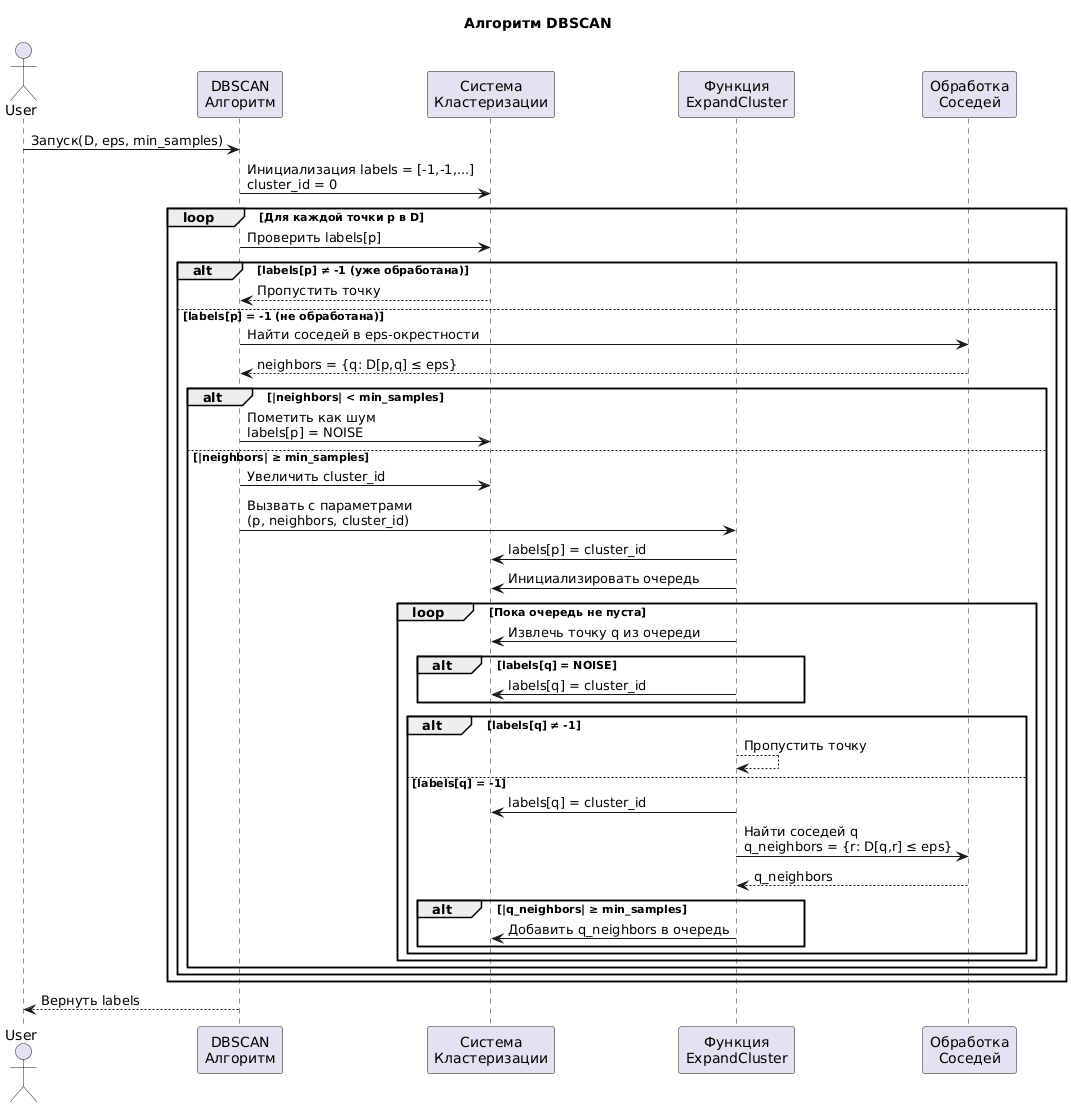

In [27]:
from IPython.display import Image
Image(filename='UML-диаграмма DBSCAN.png')